## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 22
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[cols] = diabetes_data[cols].replace(['0',0],np.nan)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a278db290>,
      dtype=object)

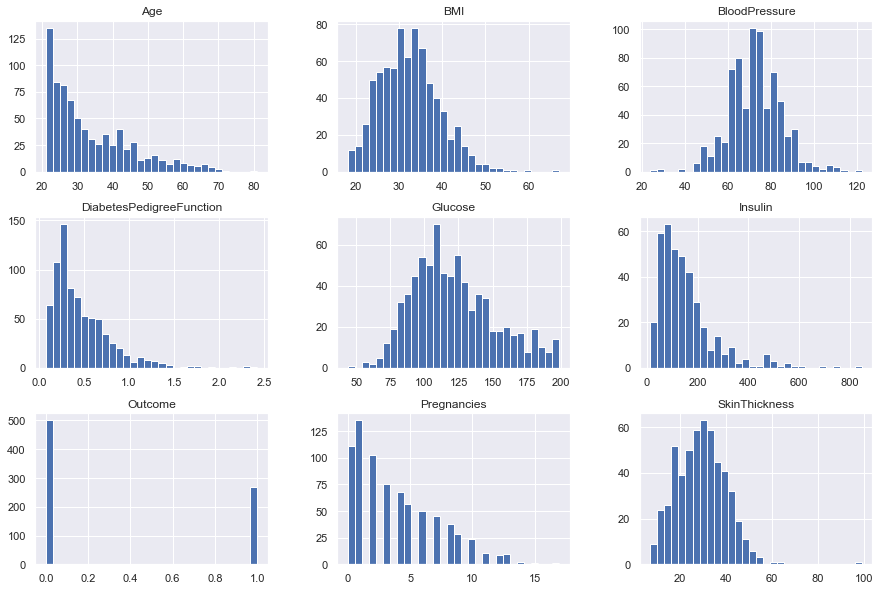

In [48]:
diabetes_data.hist(bins=30, figsize=(15, 10))

#### Replace the zeros with mean and median values.

In [6]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110ed6910>,
      dtype=object)

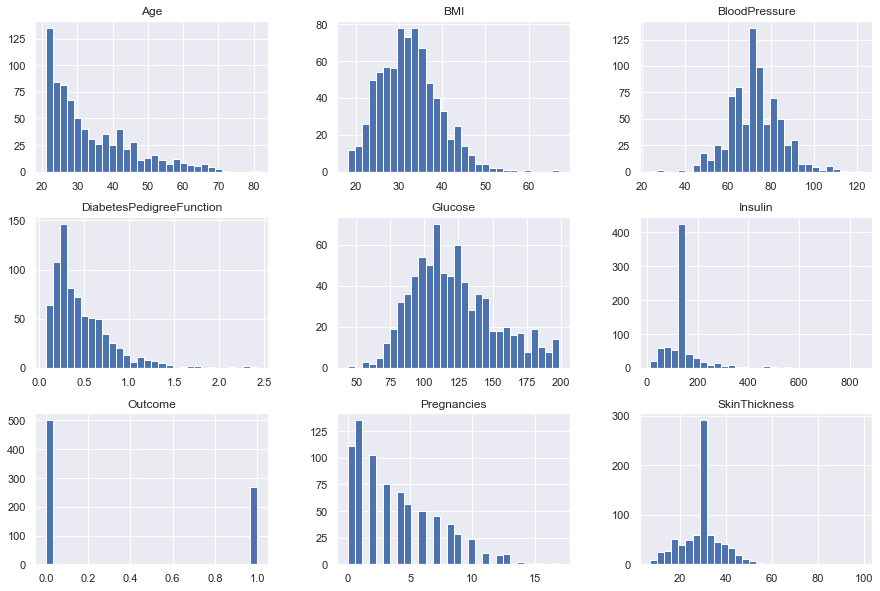

In [8]:
diabetes_data.hist(bins=30, figsize=(15,10))

#### Plot the correlation matrix heatmap

Correlation between various features


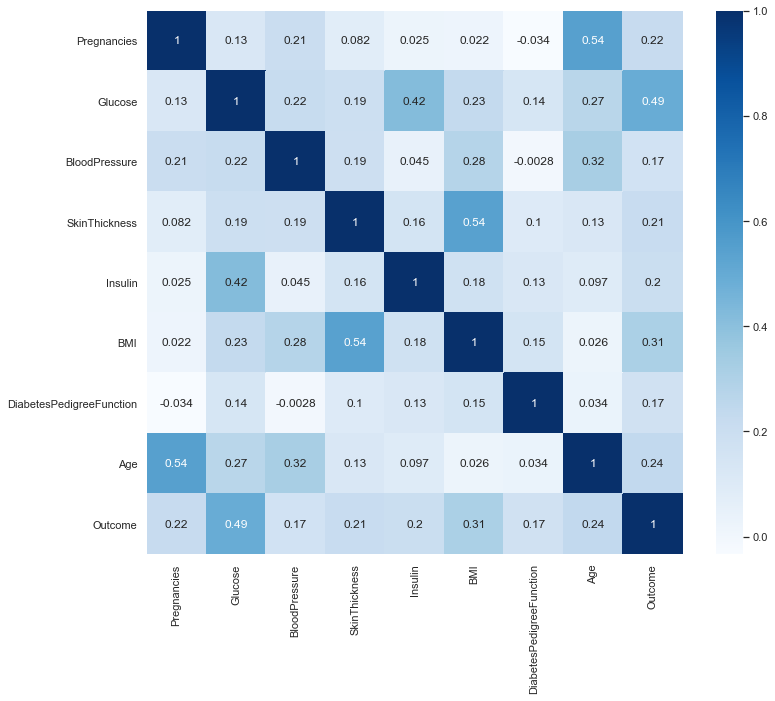

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [7]:
y = diabetes_data['Outcome']

In [8]:
X = diabetes_data.loc[:, ~diabetes_data.columns.isin(['Outcome'])]

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=12)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
scaler_train= scaler.transform(X_train)
scaler_test = scaler.transform(X_test)
X_train_scaler = pd.DataFrame(scaler_train,columns = diabetes_data.columns[:-1])
X_test_scaler = pd.DataFrame(scaler_test,columns = diabetes_data.columns[:-1])


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [11]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaler,y_train)
    
    train_scores.append(knn.score(X_train_scaler,y_train))
    test_scores.append(knn.score(X_test_scaler,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [12]:
for m in range(1,i):
    print('for i =',m)
    print('Training score=', train_scores[m-1],'  Testing score=', test_scores[m-1])

for i = 1
Training score= 1.0   Testing score= 0.683982683982684
for i = 2
Training score= 0.8212290502793296   Testing score= 0.658008658008658
for i = 3
Training score= 0.8379888268156425   Testing score= 0.70995670995671
for i = 4
Training score= 0.8063314711359404   Testing score= 0.7272727272727273
for i = 5
Training score= 0.819366852886406   Testing score= 0.7229437229437229
for i = 6
Training score= 0.7932960893854749   Testing score= 0.7229437229437229
for i = 7
Training score= 0.8044692737430168   Testing score= 0.7445887445887446
for i = 8
Training score= 0.7970204841713222   Testing score= 0.7359307359307359


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [18]:
# for number of neighbors = 3, the training score is max. ie 0.837

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [19]:
# for number of neighbors = 7, the training score is max. ie 0.744

Plot the train and test model performance by number of neighbors.

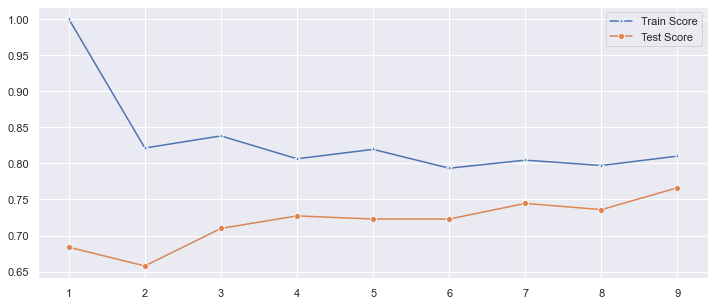

In [13]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [14]:
# n = 7 gives the best score
knn=KNeighborsClassifier(7).fit(X_train_scaler, y_train)
train_score = knn.score(X_train_scaler, y_train)
test_score = knn.score(X_test_scaler, y_test)

print('Train score =',train_score,'Test score =',test_score)

Train score = 0.8044692737430168 Test score = 0.7445887445887446


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = knn.predict(X_test_scaler)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [18]:
print(pl)

[[124  23]
 [ 36  48]]


**<font color='teal'> Print the classification report </font>**

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.68      0.57      0.62        84

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7445887445887446


#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaler,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [22]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7579958463136034
Best Parameters: {'n_neighbors': 19}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

In [23]:
y_pred_2 = knn_cv.predict(X_test_scaler)
print(confusion_matrix(y_pred_2,y_test))

[[128  37]
 [ 19  47]]


In [24]:
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       165
           1       0.56      0.71      0.63        66

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.78      0.76      0.77       231



**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [25]:
from sklearn.ensemble import RandomForestClassifier
param_grid_ = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60, 80],
    'max_features': [2,3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}
rc = RandomForestClassifier()
rc_cv = GridSearchCV(rc, param_grid_,cv = 3, n_jobs = -1, verbose = 2)

In [26]:
rc_cv.fit(X_train_scaler,y_train)
rc_cv.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  2.2min finished


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [27]:
print("Best Score:" + str(rc_cv.best_score_))
print("Best Parameters: " + str(rc_cv.best_params_))

Best Score:0.7709497206703911
Best Parameters: {'bootstrap': True, 'max_depth': 60, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [28]:
y_pred_3 = rc_cv.predict(X_test_scaler)
print(classification_report(y_pred_3,y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       156
           1       0.64      0.72      0.68        75

    accuracy                           0.78       231
   macro avg       0.75      0.76      0.76       231
weighted avg       0.79      0.78      0.78       231



## Random Search CV

In [29]:
#For Random Forest
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'bootstrap': [True,False],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6, 10],
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
}
rc_cv_2 = RandomizedSearchCV(rc,random_grid,cv=3,n_iter=100, n_jobs=-1, verbose=2)


In [30]:
rc_cv_2.fit(X_train_scaler,y_train)
print("Best Score:" + str(rc_cv_2.best_score_))
print("Best Parameters: " + str(rc_cv_2.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


Best Score:0.7653631284916201
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}


In [34]:
y_pred_4 = rc_cv_2.predict(X_test_scaler)
print(classification_report(y_pred_4,y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       165
           1       0.57      0.73      0.64        66

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.77      0.77       231

